In [23]:
import pandas as pd
import json
import mysql.connector
import matplotlib.pyplot as plt

First, we have to create a connection between Python and our database.

In [2]:
with open('cnf.json','r') as config_file:
    db_config = json.load(config_file)

In [3]:
conn = mysql.connector.connect(
    host=db_config['host'],
    port=db_config['port'],
    user=db_config['user'],
    password=db_config['password'],
    database=db_config['database'],
    auth_plugin='mysql_native_password'
    )

In [13]:
sql_query="""
    SELECT * FROM CUSTOMER
    """
customerDF=pd.read_sql(sql_query,conn)


sql_query="""
    SELECT * FROM INVOICE
    """
InvoiceDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM INVOICELINE
    """
InvoiceLNDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM ALBUM
    """
ALBDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM GENRE
    """
GNDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM PLAYLIST
    """
PLISTDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM PLAYLISTTRACK
    """
PLISTRACKDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM TRACK
    """
TRACKDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM MEDIATYPE
    """
MTYPEDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM ARTIST
    """
ARTDF=pd.read_sql(sql_query,conn)

sql_query="""
    SELECT * FROM EMPLOYEE
    """
EMPDF=pd.read_sql(sql_query,conn)


In [6]:
customerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-null     object
 4   Address       59 non-null     object
 5   City          59 non-null     object
 6   State         30 non-null     object
 7   Country       59 non-null     object
 8   PostalCode    55 non-null     object
 9   Phone         58 non-null     object
 10  Fax           12 non-null     object
 11  Email         59 non-null     object
 12  SupportRepId  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [7]:
InvoiceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceId          412 non-null    int64         
 1   CustomerId         412 non-null    int64         
 2   InvoiceDate        412 non-null    datetime64[ns]
 3   BillingAddress     412 non-null    object        
 4   BillingCity        412 non-null    object        
 5   BillingState       210 non-null    object        
 6   BillingCountry     412 non-null    object        
 7   BillingPostalCode  384 non-null    object        
 8   Total              412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 29.1+ KB


In [11]:
InvoiceLNDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceLineId  2240 non-null   int64  
 1   InvoiceId      2240 non-null   int64  
 2   TrackId        2240 non-null   int64  
 3   UnitPrice      2240 non-null   float64
 4   Quantity       2240 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 87.6 KB


In [14]:
ARTDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [15]:
MTYPEDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MediaTypeId  5 non-null      int64 
 1   Name         5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [16]:
TRACKDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2526 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


In [17]:
PLISTRACKDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PlaylistId  8715 non-null   int64
 1   TrackId     8715 non-null   int64
dtypes: int64(2)
memory usage: 136.3 KB


Total Artists: 275


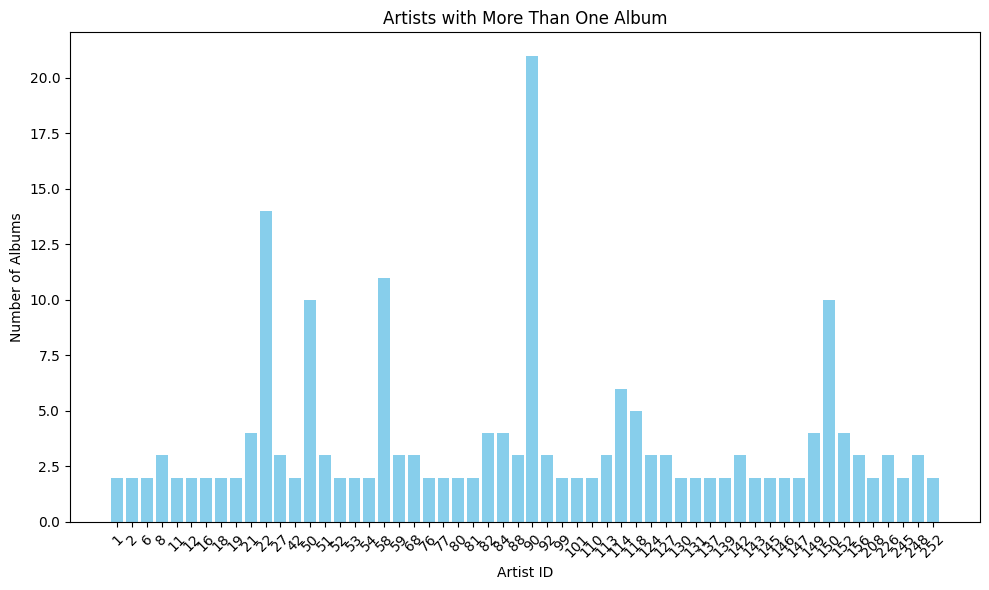

In [49]:
# Count of unique artists
total_artists = ARTDF['ArtistId'].nunique()
print(f"Total Artists: {total_artists}")

albums_per_artist = ALBDF.groupby('ArtistId')['AlbumId'].nunique()

# Step 2: Filter for artists with more than 1 album
artists_with_multiple_albums = albums_per_artist[albums_per_artist > 1]



artists_multiple_albums_df = artists_with_multiple_albums.reset_index()
artists_multiple_albums_df.columns = ['ArtistId', 'AlbumCount']

plt.figure(figsize=(10, 6))
plt.bar(artists_multiple_albums_df['ArtistId'].astype(str), artists_multiple_albums_df['AlbumCount'], color='skyblue')
plt.title('Artists with More Than One Album')
plt.xlabel('Artist ID')
plt.ylabel('Number of Albums')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

For precise computation we can show how many artists present how many albums. For example, abou 150 artists present just 1 album. The histogram shows that these values are not normal.

Total Albums: 347


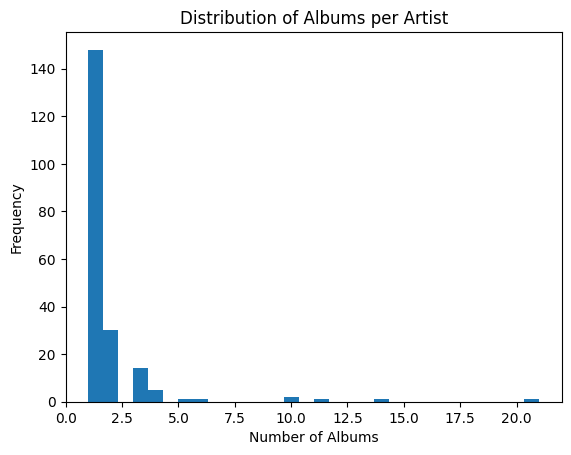

In [57]:
# Count of albums
total_albums = ALBDF['AlbumId'].nunique()
print(f"Total Albums: {total_albums}")

# Albums per artist
albums_per_artist = ALBDF.groupby('ArtistId').size()

# Plotting
albums_per_artist.plot(kind='hist', bins=30, title='Distribution of Albums per Artist')
plt.xlabel('Number of Albums')
plt.ylabel('Frequency')
plt.show()

Another key variable can be found in Track table. We can find an ablbum has how many tracks. This can be done using the following commands. For eaxmple, there are more than 90 albums that have only 1 track.

Total Tracks: 3503


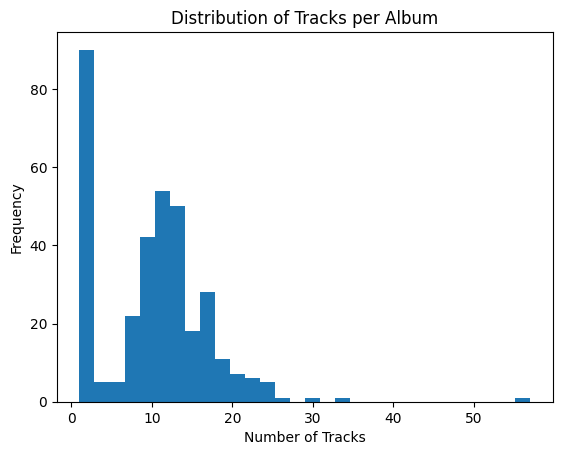

In [55]:
# Total tracks
total_tracks = TRACKDF['TrackId'].nunique()
print(f"Total Tracks: {total_tracks}")

# Distribution of tracks by album
tracks_per_album = TRACKDF.groupby('AlbumId').size()
tracks_per_album
# Plotting
tracks_per_album.plot(kind='hist', bins=30, title='Distribution of Tracks per Album')
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.show()

We can determine the distribution of customers countries. Which country has the largest number of customers? Considering the following commands and plot we have 59 customers, that about 13 of them are from USA. 

Total Customers: 59


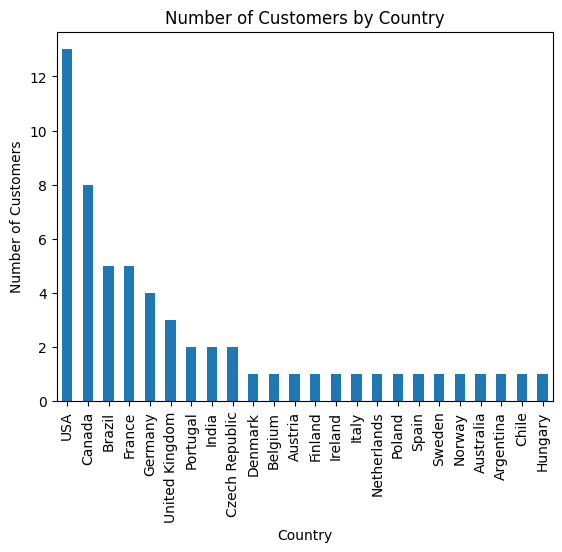

In [58]:
# Total customers
total_customers = customerDF['CustomerId'].nunique()
print(f"Total Customers: {total_customers}")

# Distribution of customers by country
customer_country_distribution = customerDF['Country'].value_counts()

# Plotting
customer_country_distribution.plot(kind='bar', title='Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

Number of invoices is another key variable can be seen as a parameter. This value can be calculated by the unique factors that published. In the plot we can see that 

In [73]:
# Total invoices
total_invoices = InvoiceDF['InvoiceId'].nunique()
print(f"Total Invoices: {total_invoices}")

# Distribution of invoice amounts
invoice_amounts = InvoiceDF.groupby('CustomerId')['InvoiceId'].nunique()
invoice_amounts_df=invoice_amounts.reset_index()
invoice_amounts_df.columns= ['CustomerId','Number of Invoices']
invoice_amounts_df
# plt.figure(figsize=(10, 6))
# plt.bar(invoice_amounts_df['CustomerId'].astype(str), invoice_amounts_df['Number of Invoices'], color='skyblue')

#print(invoice_amounts)
# Plotting
#invoice_amounts.plot(kind='hist', bins=30, title='Distribution of Invoice Amounts')
# plt.xlabel('Invoice Amount')
# plt.ylabel('Frequency')
# plt.show()

Total Invoices: 412


,CustomerId,Number of Invoices
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7


In [90]:
# Total employees
total_employees = EMPDF['EmployeeId'].nunique()
print(f"Total Employees: {total_employees}")

# Sales performance by employee
EMPDF['BirthDate'] = pd.to_datetime(EMPDF['BirthDate'])

oldest_employee = EMPDF.loc[EMPDF['BirthDate'].idxmin()]

oldest_employee

EMPDF['HireDate'] = pd.to_datetime(EMPDF['HireDate'])
earliest_hired_employee = EMPDF.loc[EMPDF['HireDate'].idxmin()]
earliest_hired_employee
# Plotting
# sales_per_employee_summary.plot(kind='bar', title='Total Sales by Employee')
# plt.xlabel('Employee')
# plt.ylabel('Total Sales')
# plt.show()

Total Employees: 8


EmployeeId                       3
LastName                   Peacock
FirstName                     Jane
Title          Sales Support Agent
ReportsTo                      2.0
BirthDate      1973-08-29 00:00:00
HireDate       2002-04-01 00:00:00
Address              1111 6 Ave SW
City                       Calgary
State                           AB
Country                     Canada
PostalCode                 T2P 5M5
Phone            +1 (403) 262-3443
Fax              +1 (403) 262-6712
Email         jane@chinookcorp.com
Name: 2, dtype: object

Q4. 

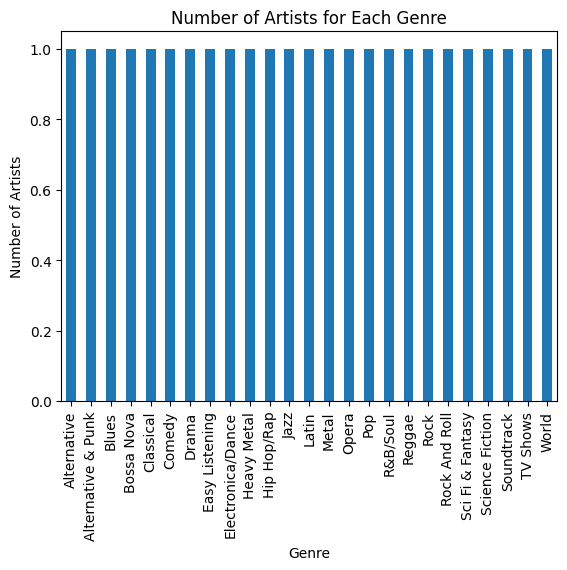

In [98]:
#Number of artists based on genre. Using a bar chart, we can see which genres or countries have the highest number of artists or customers. This information can help identify target markets.
artist_count_by_genre = ALBDF.merge(TRACKDF, on='AlbumId').merge(GNDF, on='GenreId')
artist_count_by_genre = artist_count_by_genre.groupby(GNDF['Name'])['ArtistId'].nunique()

# Bar chart
artist_count_by_genre.plot(kind='bar', title='Number of Artists for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Artists')
plt.show()

Using Line charts can be used to show changes in the number of invoices over time.


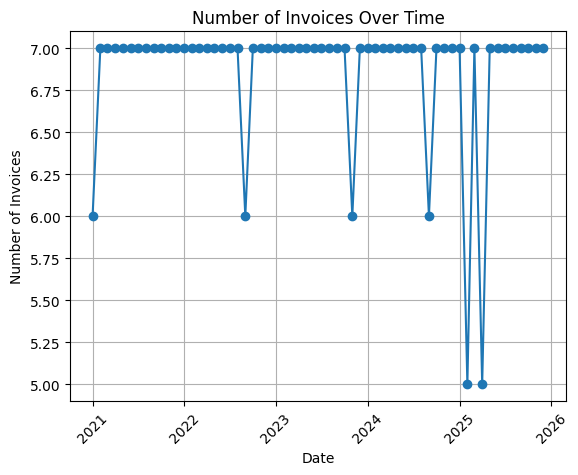

In [108]:
# Example: Number of invoices over time
invoice_counts = InvoiceDF.groupby(InvoiceDF['InvoiceDate'].dt.to_period('M')).size()
invoice_counts_df = invoice_counts.reset_index()
invoice_counts_df.columns = ['Period', 'InvoiceCount']
invoice_counts_df['Period'] = invoice_counts_df['Period'].dt.to_timestamp()

# Line chart
plt.plot(invoice_counts_df['Period'], invoice_counts_df['InvoiceCount'], marker='o')
plt.title('Number of Invoices Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.grid()
plt.show()

We can use a Histogram to find the number of tracks for ALbums.

Text(0.5, 1.0, 'Number of Tracks For Albums')

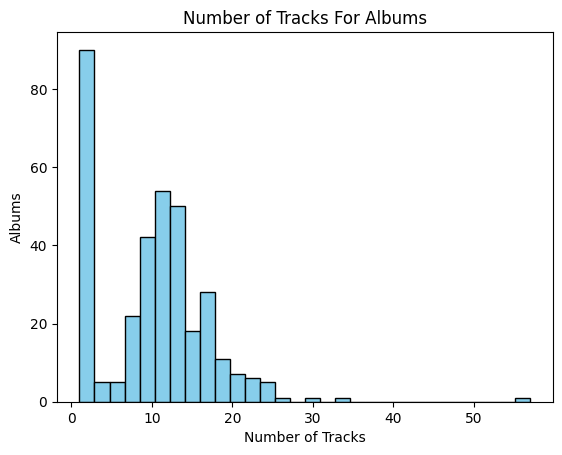

In [113]:
#Number of Tracks for each Album
ALBTRK=TRACKDF.groupby('AlbumId')['TrackId'].nunique()
ALBTRK
 
# plot a histogram
plt.hist(ALBTRK, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Tracks')
plt.ylabel('Albums')
plt.title('Number of Tracks For Albums')

For example, about 90 albums has only 1 track or near 50 albums has 10 tracks.

Using a scatter plot, we can see if there is a relationship between the date and the number of invoices. This can help identify seasonal patterns or other trends.

       Period  InvoiceCount
0  2021-01-01             6
1  2021-02-01             7
2  2021-03-01             7
3  2021-04-01             7
4  2021-05-01             7
5  2021-06-01             7
6  2021-07-01             7
7  2021-08-01             7
8  2021-09-01             7
9  2021-10-01             7
10 2021-11-01             7
11 2021-12-01             7
12 2022-01-01             7
13 2022-02-01             7
14 2022-03-01             7
15 2022-04-01             7
16 2022-05-01             7
17 2022-06-01             7
18 2022-07-01             7
19 2022-08-01             7
20 2022-09-01             6
21 2022-10-01             7
22 2022-11-01             7
23 2022-12-01             7
24 2023-01-01             7
25 2023-02-01             7
26 2023-03-01             7
27 2023-04-01             7
28 2023-05-01             7
29 2023-06-01             7
30 2023-07-01             7
31 2023-08-01             7
32 2023-09-01             7
33 2023-10-01             7
34 2023-11-01       

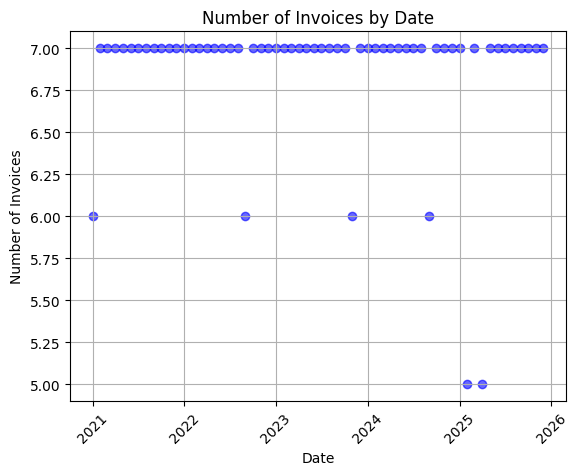

In [115]:
InvoiceDF['InvoiceDate'] = pd.to_datetime(InvoiceDF['InvoiceDate'])

# Group the invoices by month and count the number of invoices
invoice_counts = InvoiceDF.groupby(InvoiceDF['InvoiceDate'].dt.to_period('M')).size()

# Reset the index to create a DataFrame
invoice_counts_df = invoice_counts.reset_index()
invoice_counts_df.columns = ['Period', 'InvoiceCount']

# Convert Period back to datetime for plotting
invoice_counts_df['Period'] = invoice_counts_df['Period'].dt.to_timestamp()

# Print the resulting DataFrame
print(invoice_counts_df)


plt.scatter(invoice_counts_df['Period'], invoice_counts_df['InvoiceCount'], color='blue', alpha=0.6)
plt.title('Number of Invoices by Date')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.grid()
plt.show()

From the above scatter plot, it can be found that there is no relation between date and number of invoices.

Pie chart can help us see which countries have the highest share of invoices, which can inform business decisions.

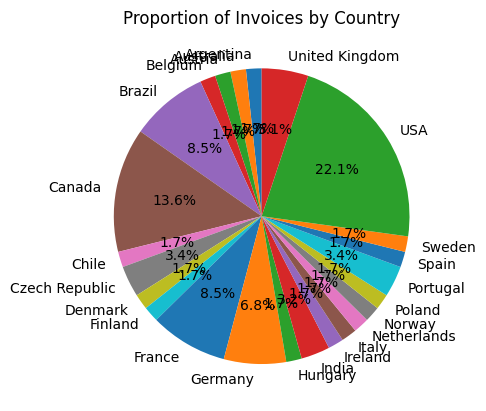

In [116]:
# Example: Proportion of invoices by country
country_invoice_counts = InvoiceDF.merge(customerDF, on='CustomerId').groupby('Country').size()
country_invoice_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Invoices by Country')
plt.ylabel('')
plt.show()

Q5.

In [117]:
from scipy.stats import shapiro

shapiro(customer_country_distribution)


ShapiroResult(statistic=0.5896368026733398, pvalue=4.7428667926396884e-07)

Since in the above, the p-value is 0.00000004 which is less than the alpha(0.05) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution.

In [ ]:
tracks_per_album

In [120]:
import scipy.stats as stats
ks_test = stats.kstest(tracks_per_album, 'norm', args=(tracks_per_album.mean(), tracks_per_album.std()))
print('Kolmogorov-Smirnov Test:', ks_test)

Kolmogorov-Smirnov Test: KstestResult(statistic=0.13903712362483392, pvalue=2.5855678096243466e-06)


According to the ktest, the number of tracks in albums is not normal because is less than 0.05.

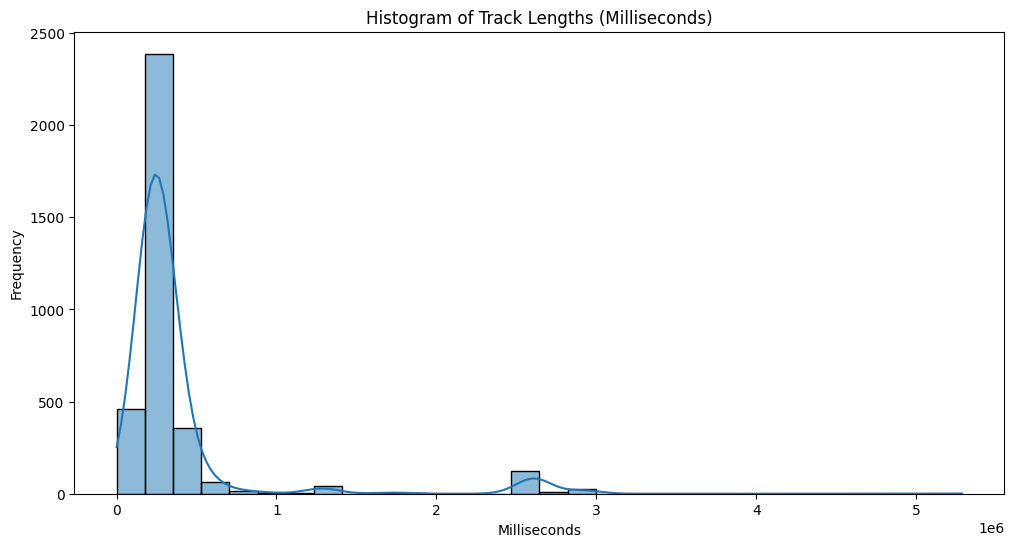

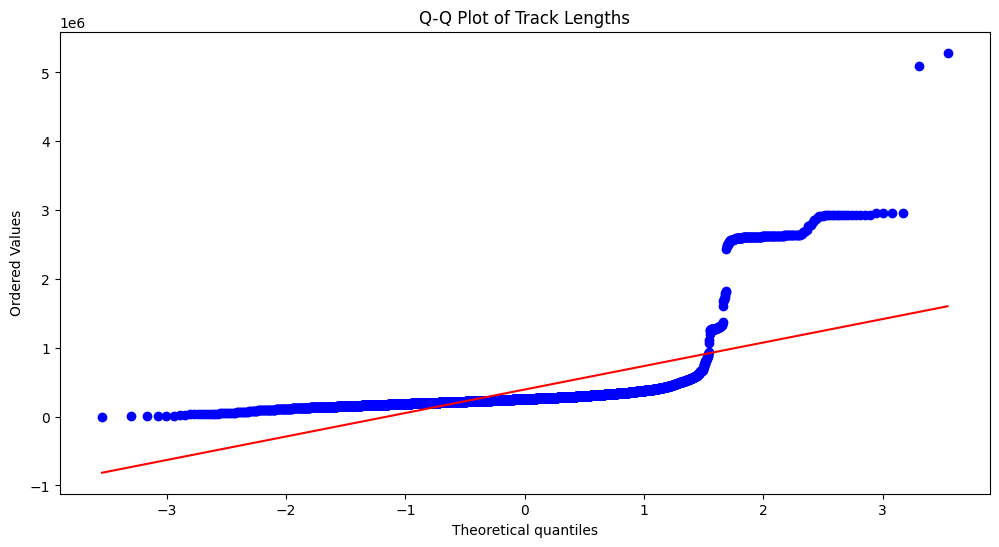

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(TRACKDF['Milliseconds'], bins=30, kde=True)
plt.title('Histogram of Track Lengths (Milliseconds)')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(TRACKDF['Milliseconds'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Track Lengths')
plt.show()

Total Employees: 8


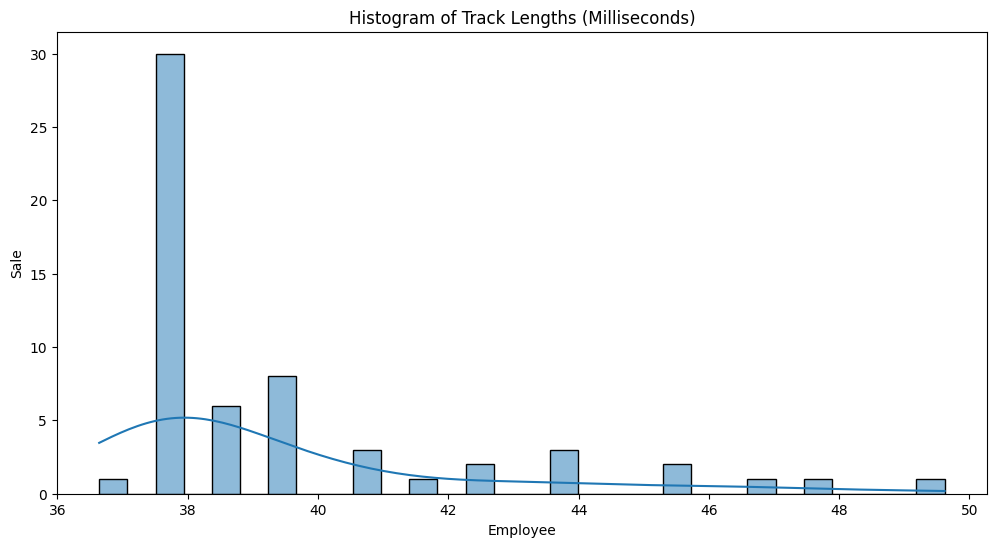

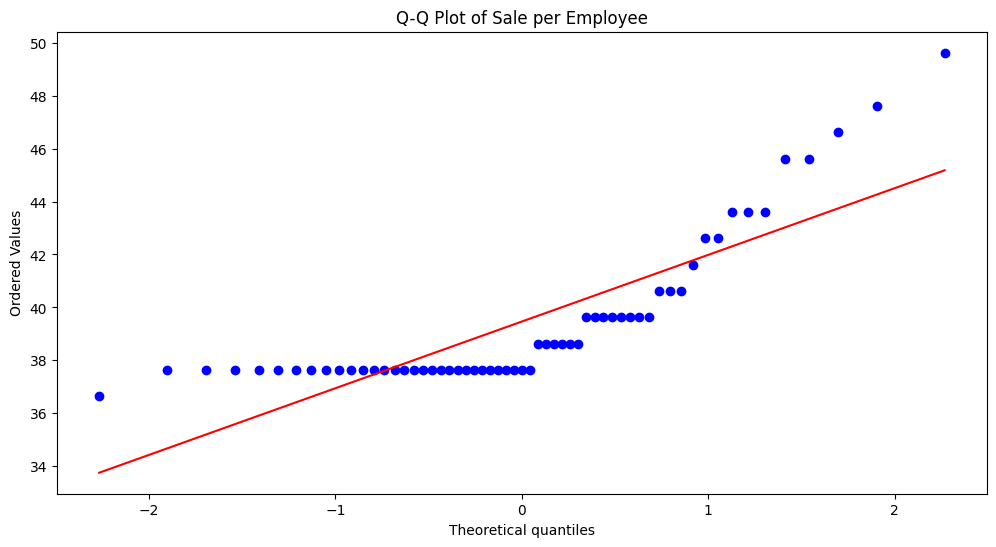

In [135]:
# Total employees
total_employees = EMPDF['EmployeeId'].nunique()
print(f"Total Employees: {total_employees}")

# Sales performance by employee
sales_per_employee = InvoiceDF.merge(customerDF, on='CustomerId').merge(EMPDF,  left_on='SupportRepId', right_on='EmployeeId')
# sales_per_employee
sales_per_employee_summary = sales_per_employee.groupby(['FirstName_x', 'LastName_x'])['Total'].sum()
sales_per_employee_summary
# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(sales_per_employee_summary, bins=30, kde=True)
plt.title('Histogram of Sales per Employee')
plt.xlabel('Employee')
plt.ylabel('Sale')
plt.show()

# Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(sales_per_employee_summary, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sale per Employee')
plt.show()

Q6.

FirstName_x  LastName_x
Helena       Holý          49.62
Name: Total, dtype: float64


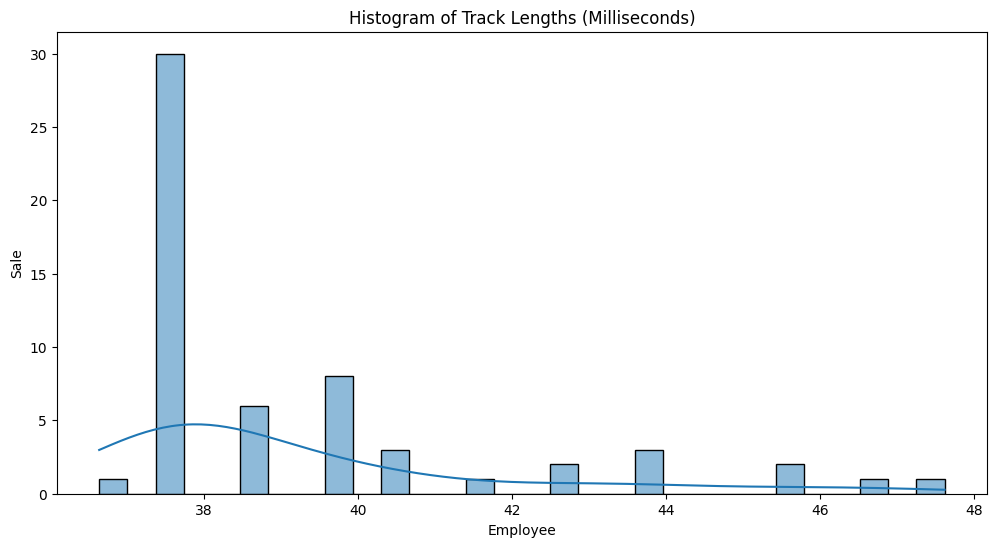

In [145]:
mean = sales_per_employee_summary.mean()
std_dev = sales_per_employee_summary.std()
z_scores = (sales_per_employee_summary - mean) / std_dev
outliers_z = sales_per_employee_summary[(z_scores > 3) | (z_scores < -3)]
print(outliers_z)
withoutoutliers_z = sales_per_employee_summary[(z_scores <= 3) & (z_scores >= -3)]

plt.figure(figsize=(12, 6))
sns.histplot(withoutoutliers_z, bins=30, kde=True)
plt.title('Histogram of Track Lengths (Milliseconds)')
plt.xlabel('Employee')
plt.ylabel('Sale')
plt.show()

Removing outliers helps the data being normal and the analysis be more exact. In the sales for employee data we didn't have much outliers. As we printed the outliers we can see just one outlier.

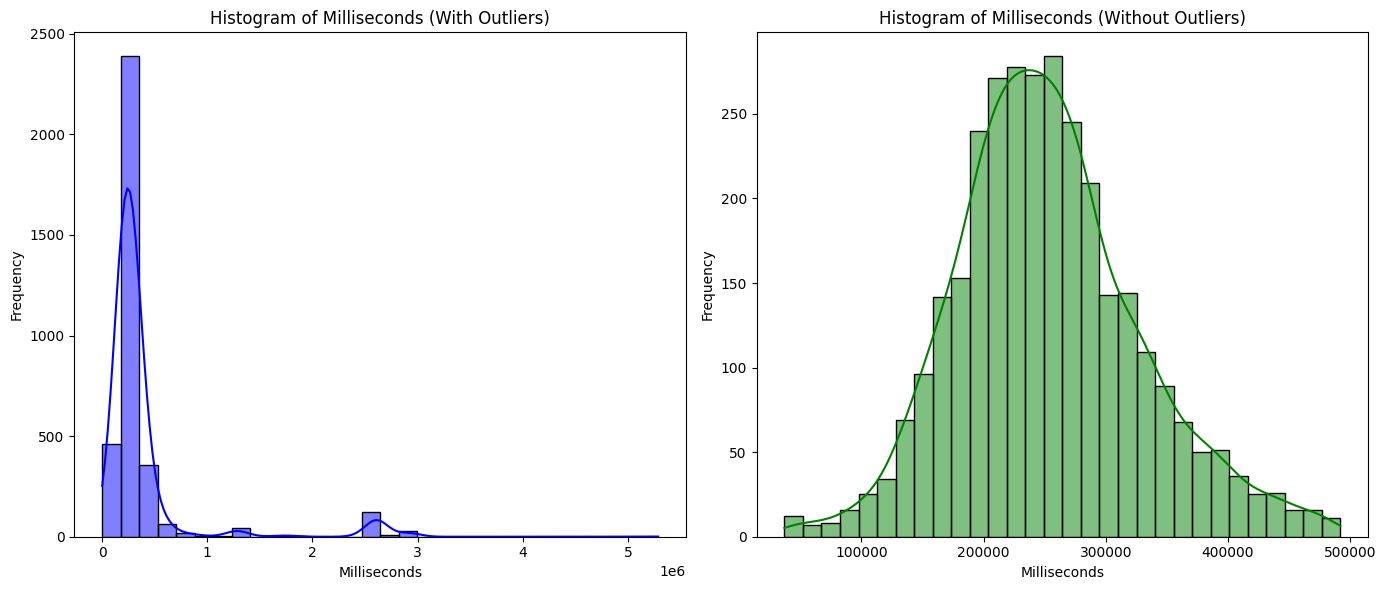

In [152]:
Q1 = TRACKDF['Milliseconds'].quantile(0.25)
Q3 = TRACKDF['Milliseconds'].quantile(0.75)
IQR = Q3 - Q1
IQR
outliers_iqr = TRACKDF[(TRACKDF['Milliseconds'] < (Q1 - 1.5 * IQR)) | (TRACKDF['Milliseconds'] > (Q3 + 1.5 * IQR))]
outliers_iqr
# Filter data to exclude outliers
TRACKDF_no_outliers = TRACKDF[~TRACKDF.index.isin(outliers_iqr.index)]

# Plotting histograms
plt.figure(figsize=(14, 6))

# Histogram before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(TRACKDF['Milliseconds'], bins=30, kde=True, color='blue')
plt.title('Histogram of Milliseconds (With Outliers)')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')

# Histogram after removing outliers
plt.subplot(1, 2, 2)
sns.histplot(TRACKDF_no_outliers['Milliseconds'], bins=30, kde=True, color='green')
plt.title('Histogram of Milliseconds (Without Outliers)')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here, removing outliers from the 'Miliseconds' of tracks gives us a normal data. This means by removing outliers we can have an analysis with more exact.

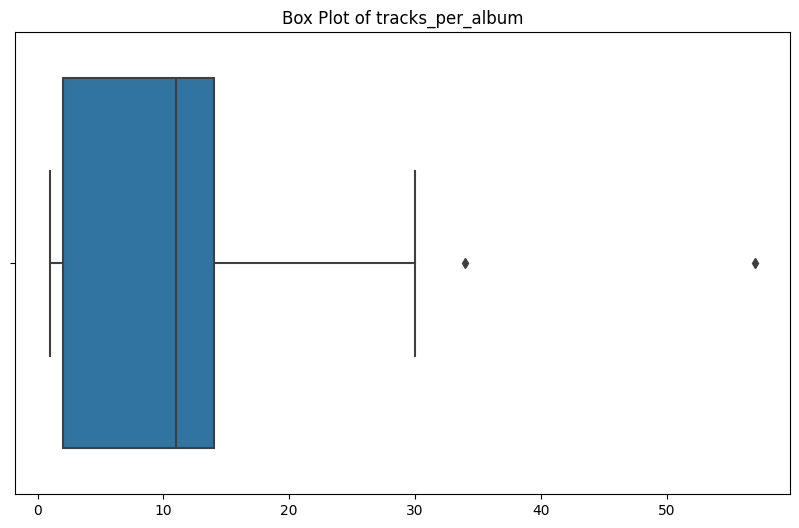

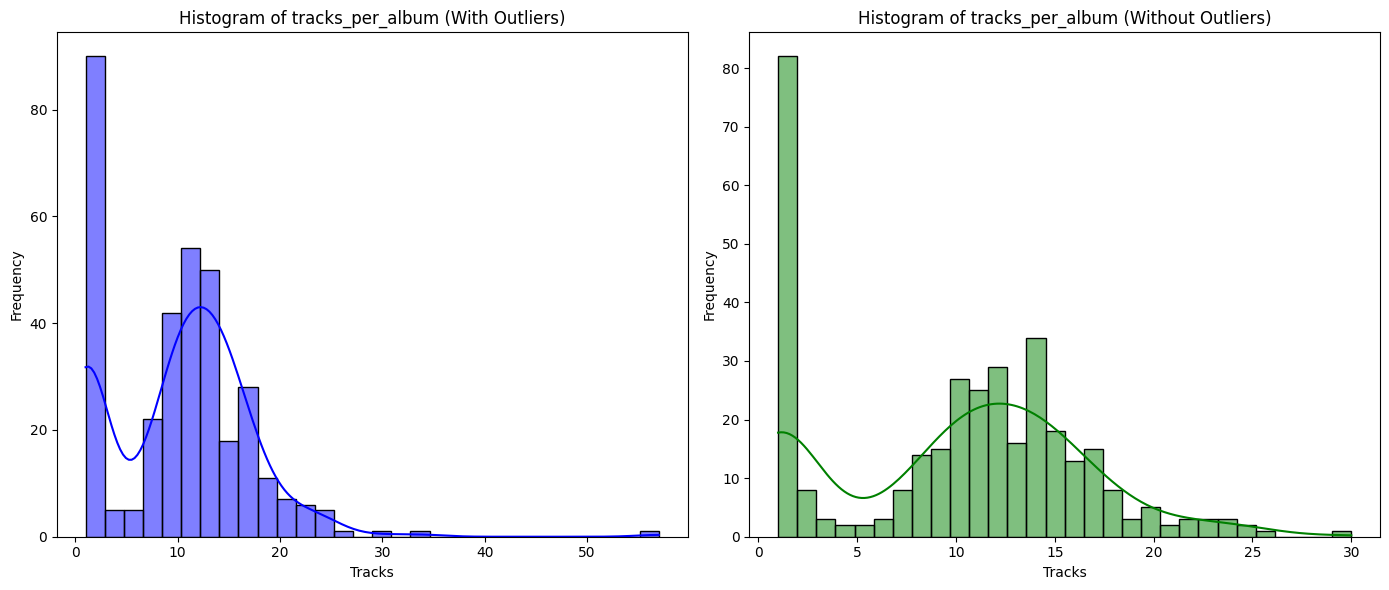

In [154]:
#identify outliers with box plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=tracks_per_album)
plt.title('Box Plot of tracks_per_album')
plt.show()

#Remove outliers
Q1 = tracks_per_album.quantile(0.25)
Q3 = tracks_per_album.quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data_no_outliers = tracks_per_album[(tracks_per_album >= lower_bound) & (tracks_per_album <= upper_bound)]
#Now plot the data with outliers and without outliers
# Plotting histograms
plt.figure(figsize=(14, 6))

# Histogram before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(tracks_per_album, bins=30, kde=True, color='blue')
plt.title('Histogram of tracks_per_album (With Outliers)')
plt.xlabel('Tracks')
plt.ylabel('Frequency')

# Histogram after removing outliers
plt.subplot(1, 2, 2)
sns.histplot(data_no_outliers, bins=30, kde=True, color='green')
plt.title('Histogram of tracks_per_album (Without Outliers)')
plt.xlabel('Tracks')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


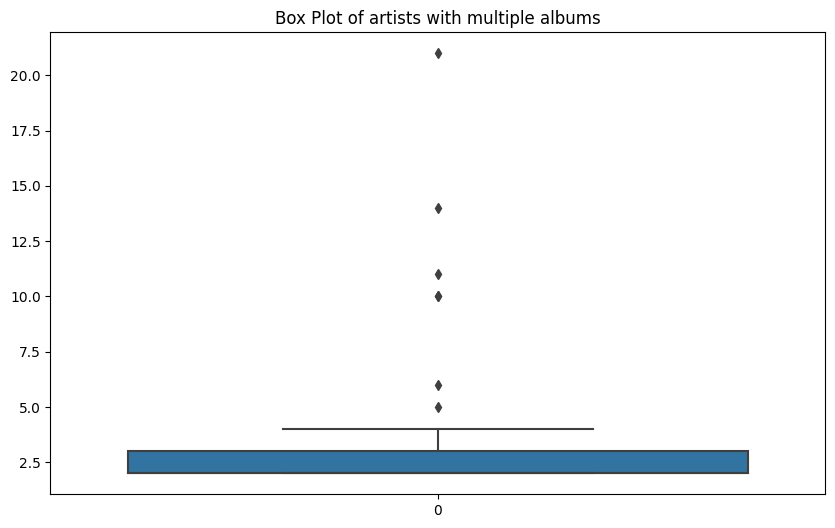

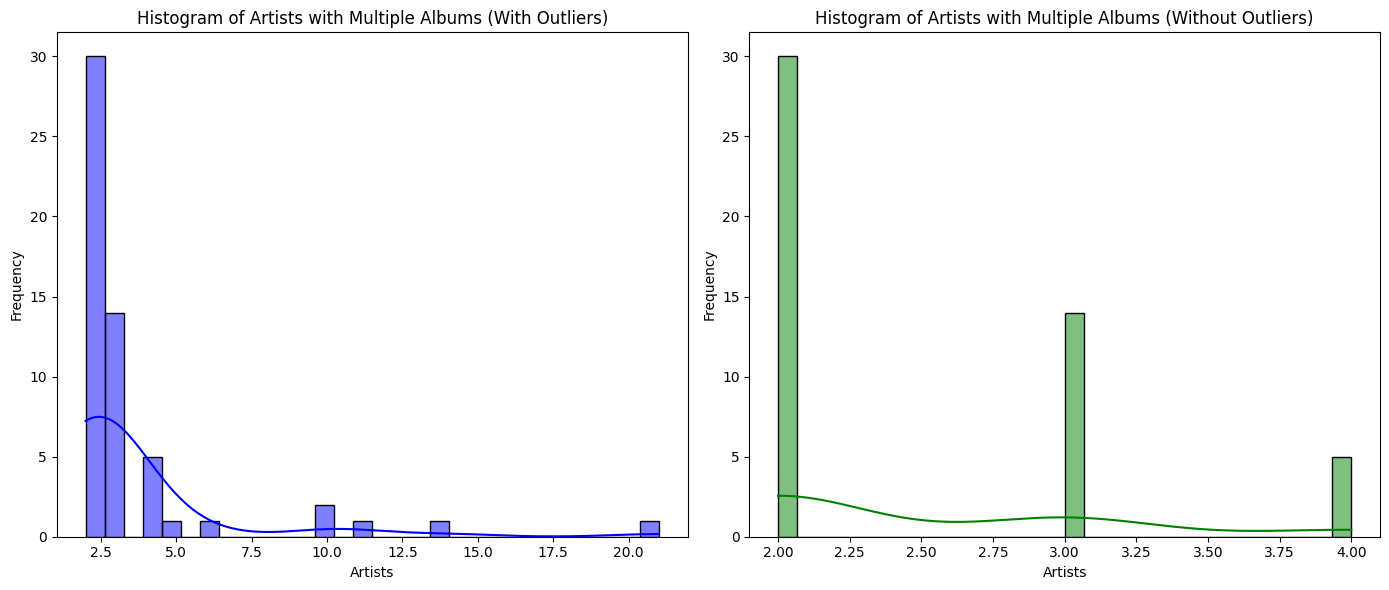

In [179]:
#identify outliers with box plot
import seaborn as sns
artDf = artists_multiple_albums_df.reset_index()
artists_multiple_albums_df
artDf.columns=['Index','Artist ID','Number of Albums']
artDf=artDf['Number of Albums']
plt.figure(figsize=(10, 6))
sns.boxplot(artDf)
plt.title('Box Plot of artists with multiple albums')
plt.show()

#Remove outliers
Q1 = artDf.quantile(0.25)
Q3 = artDf.quantile(0.75)
IQR = Q3 - Q1

# # Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# # Filter the DataFrame to remove outliers
data_no_outliers = artDf[(artDf >= lower_bound) & (artDf <= upper_bound)]
data_no_outliers
#Now plot the data with outliers and without outliers
 # Plotting histograms
plt.figure(figsize=(14, 6))

# # # Histogram before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(artDf, bins=30, kde=True, color='blue')
plt.title('Histogram of Artists with Multiple Albums (With Outliers)')
plt.xlabel('Artist')
plt.ylabel('Frequency')

# # Histogram after removing outliers
plt.subplot(1, 2, 2)
sns.histplot(data_no_outliers, bins=30, kde=True, color='green')
plt.title('Histogram of Artists with Multiple Albums (Without Outliers)')
plt.xlabel('Artist')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


According to the histograms before and after removing outliers, removing the outliers for number of albums per artists didn't lead to a normal data. It just removes some useful informations that is not good enough for analysis.

Q7.

In [233]:
import numpy as np
invoice_lines_with_tracks = InvoiceLNDF.merge(TRACKDF, on='TrackId').merge(GNDF, on='GenreId')
invoice_lines_with_tracks
#Step 1: Count the total sales for each genre
genre_sales = invoice_lines_with_tracks.groupby('Name_y')['Quantity','UnitPrice_y'].sum().reset_index()

# Step 2: Sort the genres in descending order by Quantity
sorted_genre_sales = genre_sales.sort_values(by='Quantity', ascending=False)
print(sorted_genre_sales.columns)



# Step 3: Get the top 3 genres
top_three_genres = sorted_genre_sales.head(3)
topdf=top_three_genres.reset_index()
print(topdf.columns)
top_three_genres_with_prices = top_three_genres[['Name_y', 'Quantity', 'UnitPrice_y']]

print(top_three_genres_with_prices)
top_three_genres_with_prices['avg']=top_three_genres_with_prices['UnitPrice_y']/top_three_genres_with_prices['Quantity']
top_three_genres_with_prices
avg_prices = top_three_genres_with_prices.groupby('Name_y')['avg'].apply(list)

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*avg_prices)

print(f"F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}")
# Step 5: Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis: No significant differences between groups.")


Index(['Name_y', 'Quantity', 'UnitPrice_y'], dtype='object')
Index(['index', 'Name_y', 'Quantity', 'UnitPrice_y'], dtype='object')
   Name_y  Quantity  UnitPrice_y
17   Rock       835       826.65
12  Latin       386       382.14
13  Metal       264       261.36
F-statistic: nan, p-value: nan
Fail to reject the null hypothesis: No significant differences between groups.


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
c:\USERS\ADMIN\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON37\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


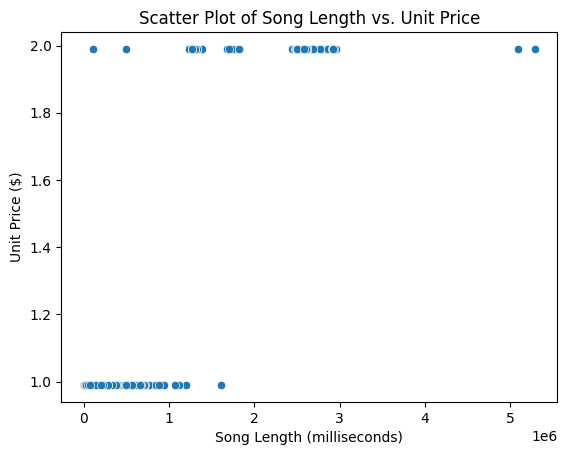

Pearson correlation: 0.9318, p-value: 0.0000
There is a significant correlation between song length and unit price.


In [239]:
from scipy.stats import pearsonr

TMdf= TRACKDF[['Milliseconds','UnitPrice']]
TMdf
sns.scatterplot(x='Milliseconds', y='UnitPrice', data=TMdf)
plt.title('Scatter Plot of Song Length vs. Unit Price')
plt.xlabel('Song Length (milliseconds)')
plt.ylabel('Unit Price ($)')
plt.show()

# Step 5: Statistical Analysis
# Calculate Pearson correlation
correlation, p_value = pearsonr(TMdf['Milliseconds'], TMdf['UnitPrice'])
print(f'Pearson correlation: {correlation:.4f}, p-value: {p_value:.4f}')

# Step 6: Interpretation
if p_value < 0.05:
    print("There is a significant correlation between song length and unit price.")
else:
    print("There is no significant correlation between song length and unit price.")


The scatter plot shows no relation between time of the song and its price. But the Pearson test tells us there is a significant relation between these two values. I guess the data maybe contains some outliers or there is a weak nonlinear relation between the two parameters.

- The independece of Genre and Media type

In [240]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(TRACKDF['GenreId'], TRACKDF['MediaTypeId'])

# Step 4: Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 5: Print the results
print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p_value:.4f}, Degrees of Freedom: {dof}")

# Step 6: Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between genre and media type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between genre and media type.")


Chi-Square Statistic: 5650.1804, p-value: 0.0000, Degrees of Freedom: 96
Reject the null hypothesis: There is a significant association between genre and media type.


Extra Q7-1. Is there a significant association between the media type of a song and the number of times it has been purchased?
Hypothesis Test: Chi-Square Test of Independence
Null Hypothesis (H0): There is no association between media type and purchase frequency.
Alternative Hypothesis (H1): There is an association between media type and purchase frequency.

In [261]:
merged_df = pd.merge(InvoiceLNDF, TRACKDF, on='TrackId')
merged_df = pd.merge(merged_df, MTYPEDF, on='MediaTypeId')
merged_df
# Create a contingency table
contingency_table = pd.crosstab(merged_df['Name_y'], merged_df['TrackId'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test results:\nChi2 Statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")

# Interpret the results
if p_value < alpha:
     print("Reject the null hypothesis: There is an association between media type and purchase frequency.")
else:
    print("Fail to reject the null hypothesis: There is no association between media type and purchase frequency.")


Chi-Square Test results:
Chi2 Statistic: 8960.0000, p-value: 0.0000
Reject the null hypothesis: There is an association between media type and purchase frequency.


Extra Q7-2. Is there a significant difference in the average number of tracks purchased by customers based on their country?
Hypothesis Test: One-way ANOVA

ANOVA results:
F-statistic: 0.6596, p-value: 0.8511
Fail to reject the null hypothesis: There is no significant difference in the average number of tracks purchased across different countries.


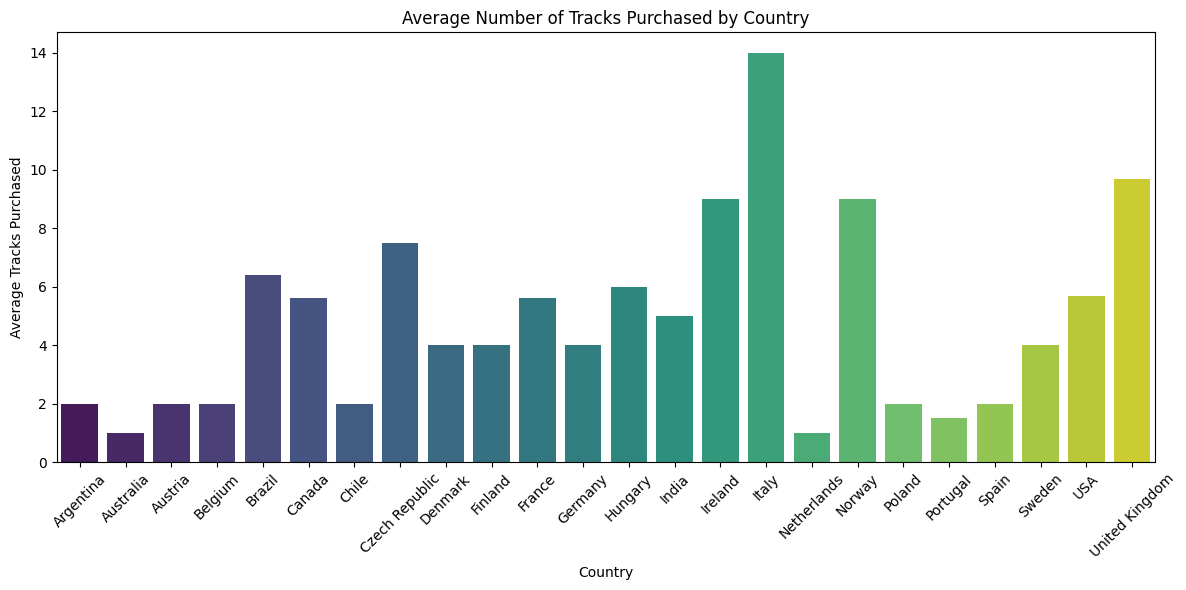

In [256]:
# Count the number of tracks purchased by each customer
# Group by InvoiceId and count the number of tracks purchased
tracks_purchased_df = InvoiceLNDF.groupby('InvoiceId').size().reset_index(name='TracksPurchased')

# Merge with customer data to get BillingCountry
merged_df = tracks_purchased_df.merge(customerDF[['CustomerId', 'Country']], left_on='InvoiceId', right_on='CustomerId', how='left')
average_tracks_by_country = merged_df.groupby('Country')['TracksPurchased'].mean().reset_index()
# Perform one-way ANOVA based on country
anova_result = stats.f_oneway(*[group['TracksPurchased'].values for name, group in merged_df.groupby('Country')])

# Print ANOVA results
print(f"ANOVA results:\nF-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

# Interpret the results
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average number of tracks purchased across different countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of tracks purchased across different countries.")

# Visualize the average tracks purchased by country
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TracksPurchased', data=average_tracks_by_country, palette='viridis')
plt.title('Average Number of Tracks Purchased by Country')
plt.xlabel('Country')
plt.ylabel('Average Tracks Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Extra Q7-3. Is there a significant difference in the average number of tracks sold by employees in different age groups?


Q8.

- **Is the average length of songs the same across different genres? Calculate the 95% confidence interval for the average length of songs in each genre.**

Alternative: 238.99 to 289.12 seconds
Alternative & Punk: 225.89 to 242.82 seconds
Blues: 249.23 to 291.49 seconds
Bossa Nova: 179.51 to 259.67 seconds
Classical: 263.04 to 324.70 seconds
Comedy: 1386.81 to 1783.72 seconds
Drama: 2448.47 to 2702.10 seconds
Easy Listening: 172.02 to 206.31 seconds
Electronica/Dance: 275.53 to 330.45 seconds
Heavy Metal: 255.06 to 339.84 seconds
Hip Hop/Rap: 152.53 to 203.82 seconds
Jazz: 269.56 to 313.95 seconds
Latin: 227.38 to 238.34 seconds
Metal: 298.82 to 320.68 seconds
Opera: nan to nan seconds
Pop: 206.43 to 251.64 seconds
R&B/Soul: 203.94 to 236.19 seconds
Reggae: 236.25 to 258.10 seconds
Rock: 277.01 to 290.81 seconds
Rock And Roll: 123.06 to 146.23 seconds
Sci Fi & Fantasy: 2887.63 to 2935.94 seconds
Science Fiction: 2608.57 to 2642.53 seconds
Soundtrack: 225.80 to 262.94 seconds
TV Shows: 2000.30 to 2289.78 seconds
World: 205.22 to 244.63 seconds

ANOVA results:
F-statistic: 1271.8994, p-value: 0.0000
Reject the null hypothesis: There are sig

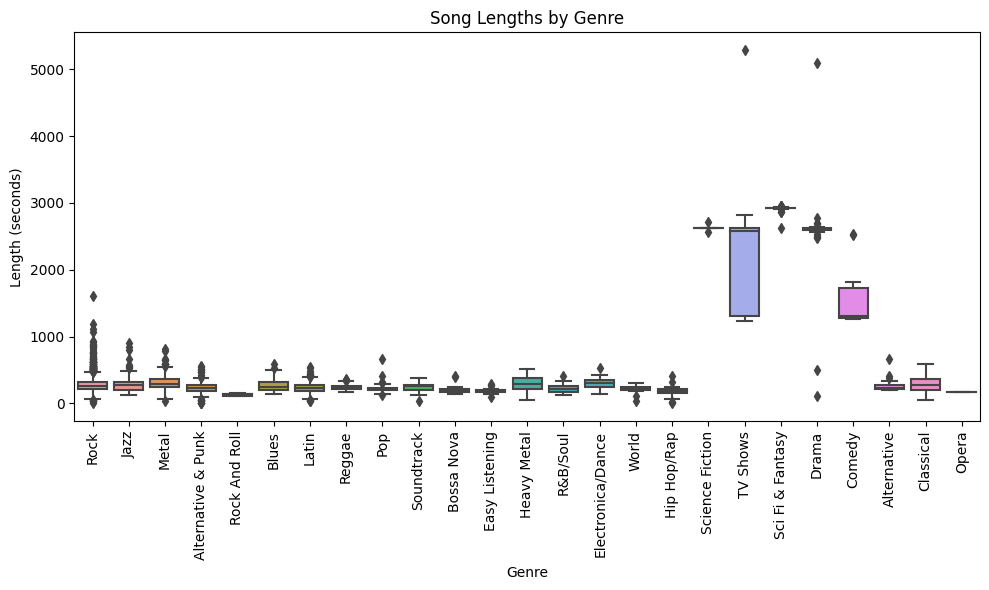

In [245]:
merged_df = pd.merge(TRACKDF, GNDF, left_on='GenreId', right_on='GenreId', suffixes=('_Track', '_Genre'))
merged_df['Seconds'] = merged_df['Milliseconds'] / 1000
merged_df
# Calculate the average length of songs and 95% confidence intervals for each genre
confidence_intervals = {}

for genre, group in merged_df.groupby('Name_Genre'):
    mean_length = group['Seconds'].mean()
    std_err = group['Seconds'].std() / (len(group) ** 0.5)
    margin_of_error = 1.96 * std_err
    confidence_intervals[genre] = (mean_length - margin_of_error, mean_length + margin_of_error)

# Print the confidence intervals
for genre, (lower, upper) in confidence_intervals.items():
    print(f"{genre}: {lower:.2f} to {upper:.2f} seconds")

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*[group['Seconds'] for _, group in merged_df.groupby('Name_Genre')])

print(f"\nANOVA results:\nF-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis: No significant differences between groups.")
# Visualize the results with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name_Genre', y='Seconds', data=merged_df)
plt.title('Song Lengths by Genre')
plt.xlabel('Genre')
plt.ylabel('Length (seconds)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As it can be seen in both Anova test result and box plots for length of song in different genres, there is a significant difference between the mean of song length in each genre.

- **What is the average sales amount in different countries? Calculate the 95% confidence interval for the average sales in each country.**


Argentina: Average Sales = 5.37, 95% CI = (1.94, 8.81)
Australia: Average Sales = 5.37, 95% CI = (1.94, 8.81)
Austria: Average Sales = 5.37, 95% CI = (1.45, 10.73)
Belgium: Average Sales = 5.37, 95% CI = (1.94, 8.81)
Brazil: Average Sales = 5.37, 95% CI = (4.00, 6.86)
Canada: Average Sales = 5.37, 95% CI = (4.29, 6.56)
Chile: Average Sales = 5.37, 95% CI = (1.76, 11.56)
Czech Republic: Average Sales = 5.37, 95% CI = (2.74, 10.15)
Denmark: Average Sales = 5.37, 95% CI = (1.94, 8.81)
Finland: Average Sales = 5.37, 95% CI = (2.48, 9.41)
France: Average Sales = 5.37, 95% CI = (4.09, 7.06)
Germany: Average Sales = 5.37, 95% CI = (3.85, 7.33)
Hungary: Average Sales = 5.37, 95% CI = (1.11, 11.92)
India: Average Sales = 5.37, 95% CI = (3.42, 8.16)
Ireland: Average Sales = 5.37, 95% CI = (1.11, 11.92)
Italy: Average Sales = 5.37, 95% CI = (1.94, 8.81)
Netherlands: Average Sales = 5.37, 95% CI = (2.22, 9.38)
Norway: Average Sales = 5.37, 95% CI = (1.76, 9.56)
Poland: Average Sales = 5.37, 95% CI

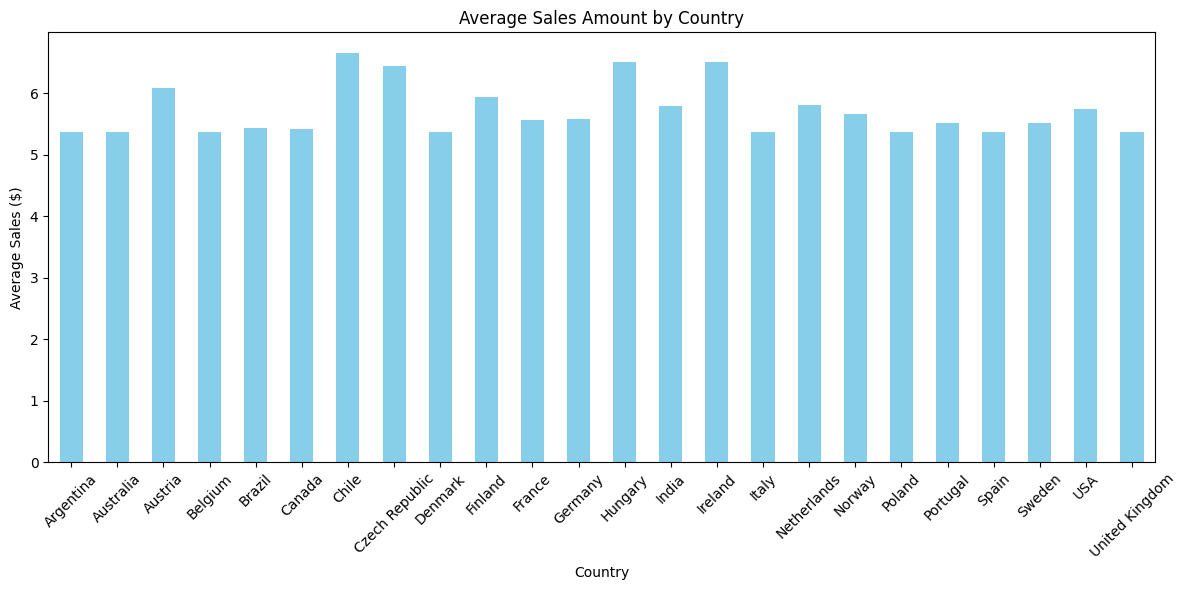

In [246]:
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Connect to the Chinook database
conn = sqlite3.connect('Chinook.sqlite')

# Step 2: Load the Invoice data into a DataFrame
invoice_query = """
SELECT BillingCountry, Total
FROM Invoice;
"""
invDF = InvoiceDF[['BillingCountry', 'Total']]

confidence_intervals = {}

# Group by BillingCountry
for country, group in invDF.groupby('BillingCountry'):
    mean_sales = group['Total'].mean()
    std_err = group['Total'].std() / (len(group) ** 0.5)  # Standard error
    margin_of_error = 1.96 * std_err  # 95% confidence interval
    confidence_intervals[country] = (mean_sales - margin_of_error, mean_sales + margin_of_error)

# Print the average sales and confidence intervals
for country, (lower, upper) in confidence_intervals.items():
    print(f"{country}: Average Sales = {group['Total'].mean():.2f}, 95% CI = ({lower:.2f}, {upper:.2f})")

# Visualize the results
plt.figure(figsize=(12, 6))
invDF.groupby('BillingCountry')['Total'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Sales Amount by Country')
plt.xlabel('Country')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **What is the average number of songs purchased by each user? Calculate the 95% confidence interval for the average number of songs purchased by each user.**

Average number of songs purchased per user: 37.97
95% Confidence Interval: (37.90, 38.03)


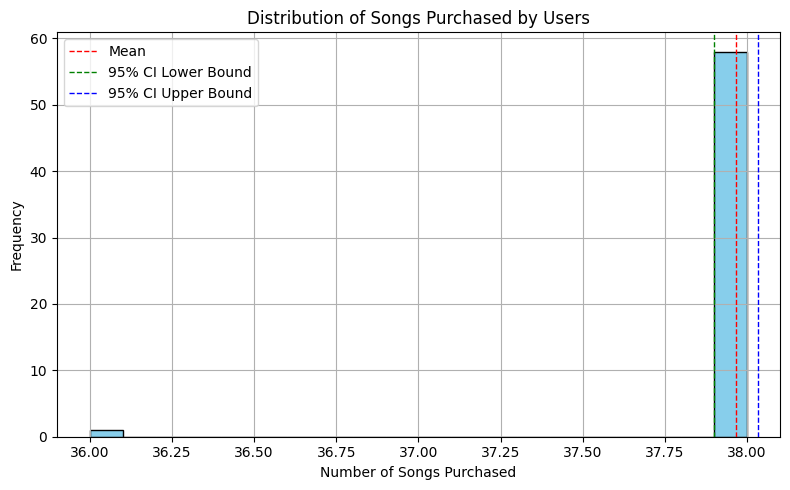

In [248]:
merged_df = pd.merge(InvoiceLNDF, InvoiceDF, on='InvoiceId')

purchases_df = merged_df.groupby('CustomerId').agg(SongsPurchased=('TrackId', 'count')).reset_index()

purchases_df
# Calculate average number of songs purchased and 95% confidence intervals
mean_purchases = purchases_df['SongsPurchased'].mean()
std_err = purchases_df['SongsPurchased'].std() / (len(purchases_df) ** 0.5)  # Standard error
margin_of_error = 1.96 * std_err  # 95% confidence interval

# Confidence interval
confidence_interval = (mean_purchases - margin_of_error, mean_purchases + margin_of_error)

# Print results
print(f"Average number of songs purchased per user: {mean_purchases:.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# Visualize the results
plt.figure(figsize=(8, 5))
purchases_df['SongsPurchased'].hist(bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_purchases, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=1, label='95% CI Upper Bound')
plt.title('Distribution of Songs Purchased by Users')
plt.xlabel('Number of Songs Purchased')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()